In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Data/2023.csv', sep=',')
df.head()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


In [3]:
df.shape

(137, 19)

In [4]:
df.isna().sum()

Country name                                  0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       1
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           1
dtype: int64

In [5]:
nan_werte = df['Healthy life expectancy'].isnull() == True
df.loc[nan_werte,:]

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
98,State of Palestine,4.908,0.092,5.089,4.727,8.716,0.859,NaN,0.694,-0.132,0.836,1.778,1.144,1.309,NaN,0.416,0.065,0.067,NaN


In [6]:
countries = df['Country name'].unique()
countries.sort()
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Honduras', 'Hong Kong S.A.R. of China',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan',
       'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kyrgyzstan', 'Laos',
       'Latvia', 'Lebanon', 'Liberia', 'Lithuania', 'Luxembourg',
       'Madagascar', 'Malawi

In [7]:
colombia_rank = df['Country name'] == 'Colombia'
df.loc[colombia_rank,:]

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
71,Colombia,5.63,0.06,5.747,5.514,9.584,0.822,69.35,0.804,-0.104,0.834,1.778,1.455,1.213,0.486,0.562,0.08,0.068,1.765


In [8]:
germany_rank = df['Country name'] == 'Germany'
df.loc[germany_rank,:]

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
15,Germany,6.892,0.049,6.989,6.795,10.879,0.896,71.3,0.846,0.03,0.42,1.778,1.919,1.401,0.539,0.618,0.153,0.365,1.898


In [9]:
df.loc[:,'Social support'].describe()

count    137.000000
mean       0.799073
std        0.129222
min        0.341000
25%        0.722000
50%        0.827000
75%        0.896000
max        0.983000
Name: Social support, dtype: float64

In [10]:
df['Healthy life expectancy'].describe()

count    136.000000
mean      64.967632
std        5.750390
min       51.530000
25%       60.648500
50%       65.837500
75%       69.412500
max       77.280000
Name: Healthy life expectancy, dtype: float64

In [11]:
df.columns

Index(['Country name', 'Ladder score', 'Standard error of ladder score',
       'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [12]:
df['Perceptions of corruption'].describe()

count    137.000000
mean       0.725401
std        0.176956
min        0.146000
25%        0.668000
50%        0.774000
75%        0.846000
max        0.929000
Name: Perceptions of corruption, dtype: float64

In [13]:
df_plot = df[['Country name',
              'Ladder score',
              'Logged GDP per capita',
              'Social support',
              'Healthy life expectancy',
              'Freedom to make life choices',
              'Generosity',
              'Perceptions of corruption']]

df_plot.head()

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379


In [14]:
df_plot = df_plot.rename(columns={'Country name':'Country_name','Ladder score':'Ladder_score','Logged GDP per capita':'Logged_GDP_per_capita',
                                  'Social support':'Social_support','Healthy life expectancy':'Healthy_life_expectancy',
                                  'Freedom to make life choices':'Freedom_to_make_life_choices','Perceptions of corruption':'Perceptions_of_corruption'})


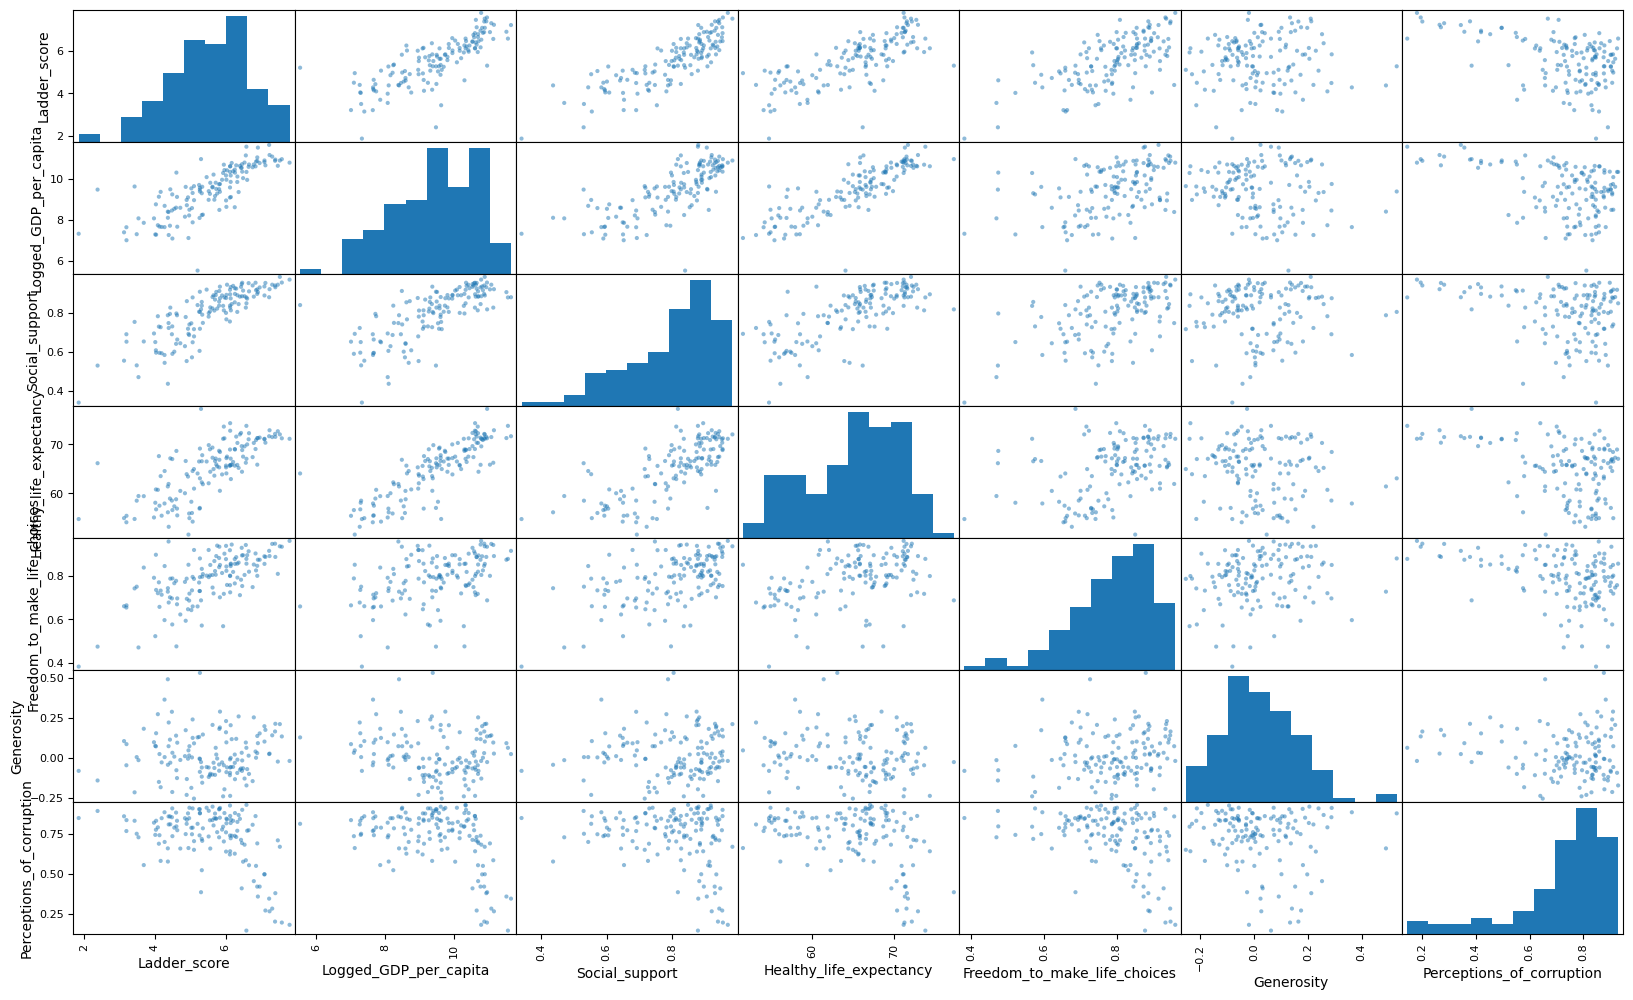

In [15]:
pd.plotting.scatter_matrix(df_plot, figsize=[20,12]);

In [16]:
import statsmodels.formula.api as smf

In [17]:
model_rating_ladder_score = smf.ols(formula='Ladder_score ~ Logged_GDP_per_capita', data=df_plot)
results = model_rating_ladder_score.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Ladder_score   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     215.9
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           8.72e-30
Time:                        17:08:11   Log-Likelihood:                -146.41
No. Observations:                 137   AIC:                             296.8
Df Residuals:                     135   BIC:                             302.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.4587      0.480     -3.038      0.003      -2.408      -0.509
Logged_GDP_per_capita     0.7406      0.050     14.692      0.000       0.641       0.840
==============================================================================
Omnibus:                       29.784   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.161
Skew:                          -0.746   Prob(JB):                     2.17e-21
Kurtosis:                       6.801   Cond. No.                         76.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Ein ladder score von 0 wird bei einem GDP per capita Wert von -1 vorhergesagt
# Die Erhöhung des GDP um 1 führt zu einer Erhöhung des ladder score um 0,7b

In [19]:
model_rating_ladder_score_health = smf.ols(formula='Ladder_score ~ Healthy_life_expectancy', data=df_plot)
results_health = model_rating_ladder_score_health.fit()
results_health.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Ladder_score   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     169.1
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           1.63e-25
Time:                        17:08:11   Log-Likelihood:                -155.13
No. Observations:                 136   AIC:                             314.3
Df Residuals:                     134   BIC:                             320.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -4.0997      0.745     -5.507      0.000      -5.572      -2.627
Healthy_life_expectancy     0.1484      0.011     13.004      0.000       0.126       0.171
==============================================================================
Omnibus:                       29.300   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.097
Skew:                          -1.030   Prob(JB):                     3.60e-11
Kurtosis:                       5.059   Cond. No.                         743.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Ein ladder score von 0 wird bei einem Healthy life expectancy Wert von -4 vorhergesagt
# Die Erhöhung der Healthy life expectancy um 1 führt zu einer Erhöhung des ladder score um 0,14

In [21]:
model_rating_ladder_score_support = smf.ols(formula='Ladder_score ~ Social_support', data=df_plot)
results_support = model_rating_ladder_score_support.fit()
results_support.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Ladder_score   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     309.7
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           9.21e-37
Time:                        17:08:11   Log-Likelihood:                -130.17
No. Observations:                 137   AIC:                             264.3
Df Residuals:                     135   BIC:                             270.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.3428      0.339     -1.013      0.313      -1.012       0.327
Social_support     7.3618      0.418     17.599      0.000       6.535       8.189
==============================================================================
Omnibus:                        2.219   Durbin-Watson:                   1.467
Prob(Omnibus):                  0.330   Jarque-Bera (JB):                2.256
Skew:                          -0.296   Prob(JB):                        0.324
Kurtosis:                       2.789   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Ein ladder score von 0 wird bei einem Social support Wert von -0,3 vorhergesagt
# Die Erhöhung des Social support um 1 führt zu einer Erhöhung des ladder score um 7

In [23]:
model_rating_ladder_score_freedom = smf.ols(formula='Ladder_score ~ Freedom_to_make_life_choices', data=df_plot)
results_freedom = model_rating_ladder_score_freedom.fit()
results_freedom.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Ladder_score   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     105.8
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           1.10e-18
Time:                        17:08:11   Log-Likelihood:                -172.18
No. Observations:                 137   AIC:                             348.4
Df Residuals:                     135   BIC:                             354.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.2446      0.520      0.471      0.639      -0.784       1.273
Freedom_to_make_life_choices     6.7249      0.654     10.288      0.000       5.432       8.018
==============================================================================
Omnibus:                        4.358   Durbin-Watson:                   0.904
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                4.346
Skew:                          -0.432   Prob(JB):                        0.114
Kurtosis:                       2.881   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Ein ladder score von 0 wird bei einem Freedom to make life choices Wert von 0.2 vorhergesagt
# Die Erhöhung der Freedom to make life choices um 1 führt zu einer Erhöhung des ladder score um 6.7

In [25]:
intercept = results.params['Intercept']
slope = results.params['Logged_GDP_per_capita']

x = pd.Series(range(15))

Y_hat = intercept + (slope*x)


In [26]:
intercept_health = results_health.params['Intercept']
slope_health = results_health.params['Healthy_life_expectancy']

x_health = pd.Series(range(85))

Y_hat_health = intercept_health + (slope_health * x_health)


In [27]:
intercept_support = results_support.params['Intercept']
slope_support = results_support.params['Social_support']

x_support = pd.Series(np.linspace(0,1,100), index=np.linspace(0,1,100))

Y_hat_support = intercept_support + (slope_support * x_support)

In [28]:
intercept_freedom = results_freedom.params['Intercept']
slope_freedom = results_freedom.params['Freedom_to_make_life_choices']

x_freedom = pd.Series(np.linspace(0,1,100), index=np.linspace(0,1,100))

Y_hat_freedom = intercept_freedom + (slope_freedom * x_freedom)

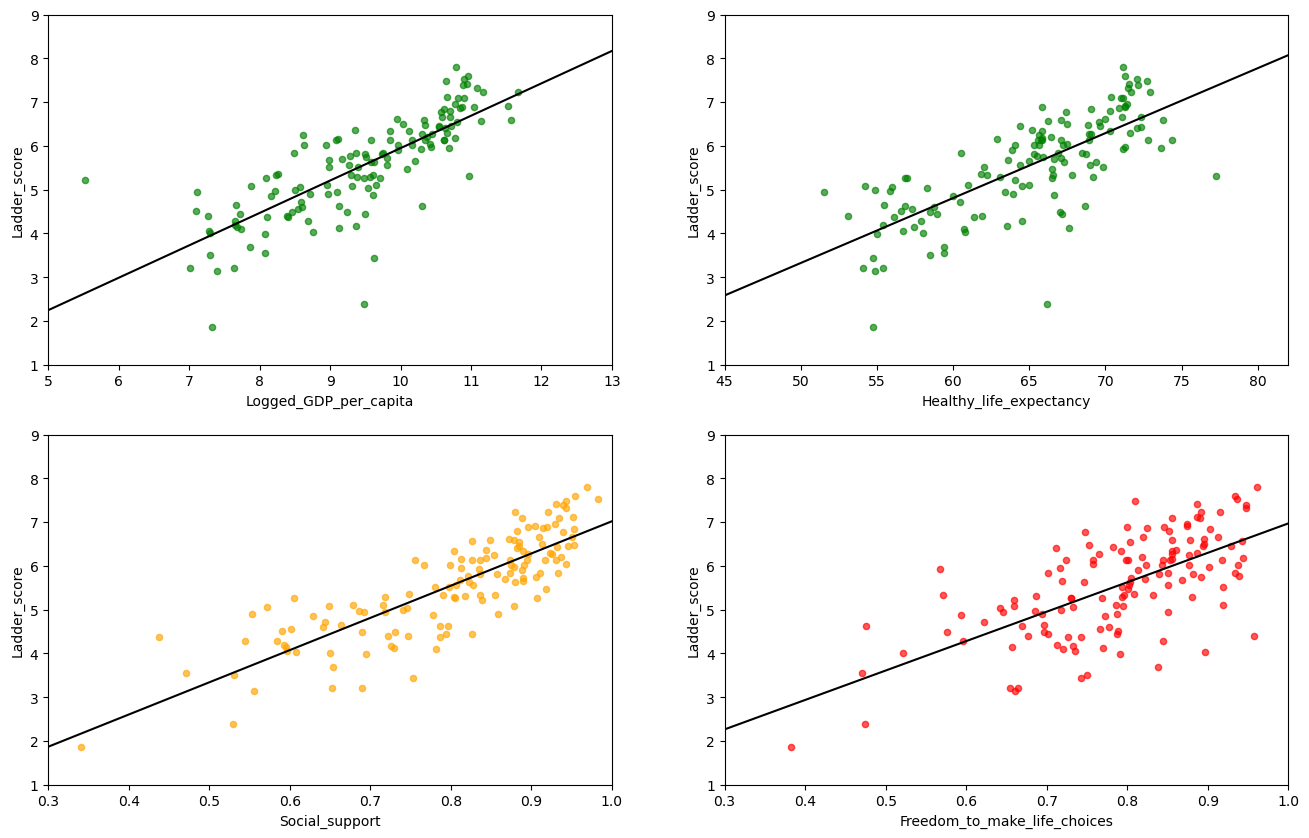

In [30]:
# ACHTUNG!
# Grün, orange und rot stehen für die Aussagekraft der linearen Regression

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=[16,10])

df_plot.plot(kind='scatter',
             x='Logged_GDP_per_capita',
             y='Ladder_score',
             alpha=0.65,
             ax=ax[0][0],
             ylim=[1,9],
             xlim=[5,13],
             color='green')
Y_hat.plot(ax=ax[0][0],
           color='black')

df_plot.plot(kind='scatter',
             x='Healthy_life_expectancy',
             y='Ladder_score',
             alpha=0.65,
             ax=ax[0][1],
             ylim=[1,9],
             xlim=[45,82],
             color='green')
Y_hat_health.plot(ax=ax[0][1],
                 color='black')

df_plot.plot(kind='scatter',
             x='Social_support',
             y='Ladder_score',
             alpha=0.65,
             ax=ax[1][0],
             ylim=[1,9],
             xlim=[0.3,1],
             color='orange')
Y_hat_support.plot(ax=ax[1][0],
                 color='black')

df_plot.plot(kind='scatter',
             x='Freedom_to_make_life_choices',
             y='Ladder_score',
             alpha=0.65,
             ax=ax[1][1],
             ylim=[1,9],
             xlim=[0.3,1],
             color='red')
Y_hat_freedom.plot(ax=ax[1][1],
                 color='black')

plt.show()